In [1]:
import sys
import time
import matplotlib.pyplot as plt
from typing import Any, Callable, Mapping, Optional
# for plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

sys.path.append("C:\\Users\\Ozymandias\\TCSPC_project\\QuTag\\quTAG_MC-Software_Python-examples-20220711 (1)\\quTAG_MC-Software_Python-examples-20220711")

In [2]:
try:
        import QuTAG_MC
except:
        Exception("Time Tagger wrapper QuTAG.py is not in the search path.")

In [3]:
try:
    qutag = QuTAG_MC.QuTAG()
except Exception as e:
    print("Error initializing quTAG: ", e)

Initialize and Start with quTAG device:  No error


In [4]:
qutag.setExposureTime(1)

0

In [5]:
qutag.enableChannels(True)

0

In [6]:
rc = qutag.getChannelsEnabled()
rc

'11111111'

In [7]:
qutag.setCoincidenceWindow(1)

0

In [8]:
data,updates = qutag.getCoincCounters()
print("data: ", data)

data:  [0 0 0 0 0 6 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
timestamps_data = qutag.getLastTimestamps(True)
timestamps_array = timestamps_data[0]
channel_numbers_array = timestamps_data[1]

# Filter time-tags for a specific channel, e.g., channel 1
channel_of_interest = 5
time_tags_channel_1 = [timestamps_array[i] for i in range(len(timestamps_array)) if channel_numbers_array[i] == channel_of_interest]

# Convert the time-tags to a more readable format if needed, e.g., from ps to ms
time_tags_channel_1_ms = [tag / 1e9 for tag in time_tags_channel_1] # Convert ps to ms

In [29]:
time_tags_channel_1_ms[-1]-time_tags_channel_1_ms[0]

111639.96275028889

In [30]:
print("latest timestamp: ", timestamps_data[0][timestamps_data[2]-1]/(1E12))


latest timestamp:  1778.467254037773


In [31]:
len(time_tags_channel_1)

475122

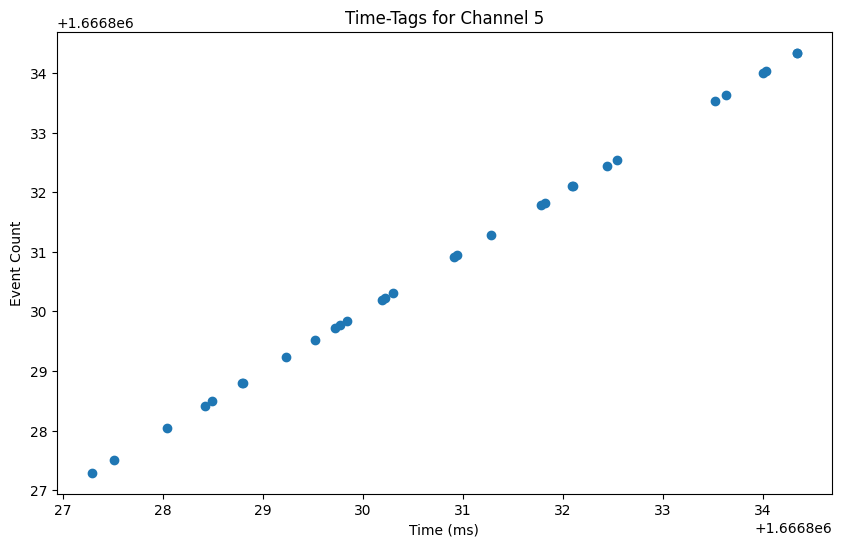

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(time_tags_channel_1_ms[0:30],time_tags_channel_1_ms[0:30], 'o') # Plot time-tags vs. event count
plt.xlabel('Time (ms)')
plt.ylabel('Event Count')
plt.title(f'Time-Tags for Channel {channel_of_interest}')
plt.show()

In [102]:
rc=qutag.getDataLost()
rc

1

In [103]:
timebase=qutag.getTimebase()

In [104]:
timebase

1e-12

In [105]:
na, coincWin, expTime=qutag.getDeviceParams()

In [44]:
na, coincWin, expTime

(0, 100, 1)

In [25]:
100*1e-12

1e-10

In [77]:
rc = qutag.startCalibration()
# wait a little to get the device started calibrating
time.sleep(.5)

calibState = qutag.getCalibrationState()
print("getCalibrationState", calibState)

while calibState:
	time.sleep(0.1)
	calibState = qutag.getCalibrationState()
	#print("getCalibrationState: ", calibState)
print("CalibrationState done:", calibState)

getCalibrationState 1
CalibrationState done: 0


In [ ]:
qutag.setCoincidenceWindow

In [64]:
qutag.deInitialize()

0